In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

from sklearn.metrics import recall_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import KFold
import numpy as np


pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)

# Data Preparation

## Combine All Data Kata

In [17]:
def merge_csv_files_with_filename(directory):
    df_list = []

    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)
            
            df = pd.read_csv(file_path)
            
            df['label'] = str(os.path.splitext(filename)[0]).capitalize() 
                
            df_list.append(df)

    combined_df = pd.concat(df_list, ignore_index=True)    
    return combined_df

directory = 'datasets/extraction-feature-default/Non-Merged'
combined_df = merge_csv_files_with_filename(directory)

combined_df.to_csv('datasets/extraction-feature-default/40-kata.csv', index=False)

## Labelling Alphabet

In [18]:
alphabet_df = pd.read_csv('./datasets/extraction-feature-default/alphabet.csv')
alphabet_df.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20
0,A_0.jpg,0.155182,0.729192,2.719984e-07,0.205288,0.735770,-0.017337,0.275075,0.718441,-0.035706,0.329495,0.709703,-0.055288,0.374989,0.702892,-0.076279,0.293241,0.639296,-0.046337,0.369748,0.612025,-0.084543,0.422023,0.597921,-0.107750,...,-0.119020,0.214076,0.620907,-0.074296,0.272353,0.658624,-0.120460,0.250701,0.692648,-0.112077,0.228995,0.689233,-0.097932,0.166513,0.630084,-0.089888,0.217268,0.657916,-0.120492,0.212754,0.687127,-0.110377,0.198819,0.687841,-0.097879
1,A_1.jpg,0.838807,0.719874,-2.164804e-07,0.771837,0.725273,-0.009544,0.705295,0.701828,-0.023455,0.662583,0.677778,-0.039253,0.628528,0.655313,-0.056163,0.697544,0.624706,-0.041077,0.612177,0.596289,-0.075613,0.560344,0.577005,-0.094528,...,-0.091366,0.778687,0.613676,-0.073650,0.714158,0.669719,-0.111475,0.741234,0.699804,-0.090671,0.767731,0.690158,-0.068801,0.825814,0.631450,-0.092105,0.772004,0.671297,-0.121461,0.778908,0.694842,-0.108882,0.794608,0.690194,-0.093175
2,A_10.jpg,0.581184,0.745845,-1.059189e-07,0.557238,0.751812,-0.004449,0.536100,0.740906,-0.010580,0.519795,0.737985,-0.017672,0.502753,0.742129,-0.025208,0.539090,0.672356,-0.008672,0.520708,0.655394,-0.017746,0.509604,0.638421,-0.024760,...,-0.023058,0.561821,0.671356,-0.017525,0.537792,0.710742,-0.025926,0.544868,0.730442,-0.019770,0.553987,0.724883,-0.015368,0.572253,0.688464,-0.023423,0.551785,0.715056,-0.030928,0.554675,0.728463,-0.027442,0.562592,0.725510,-0.023784
3,A_100.jpg,0.374870,0.759894,4.366655e-08,0.398134,0.758703,-0.007355,0.421602,0.743577,-0.017515,0.442338,0.741927,-0.028168,0.462645,0.746148,-0.039076,0.413038,0.671357,-0.023561,0.437463,0.646744,-0.040337,0.453789,0.627753,-0.050616,...,-0.047230,0.383540,0.671320,-0.034483,0.411728,0.706482,-0.052234,0.408348,0.740305,-0.046356,0.400300,0.747717,-0.039503,0.370315,0.691556,-0.041090,0.393848,0.708879,-0.052244,0.397180,0.733071,-0.047251,0.392820,0.741922,-0.041883
4,A_102.jpg,0.143311,0.835336,1.923219e-07,0.214950,0.844010,-0.012342,0.296637,0.814950,-0.027893,0.355519,0.792106,-0.046894,0.400802,0.763687,-0.066535,0.302602,0.724712,-0.037958,0.395459,0.693706,-0.078667,0.456062,0.675371,-0.102087,...,-0.119402,0.215821,0.706110,-0.072580,0.282703,0.770142,-0.123735,0.246608,0.804842,-0.112590,0.217682,0.791075,-0.096030,0.170938,0.723427,-0.091741,0.227759,0.771976,-0.123583,0.207771,0.800647,-0.111719,0.182577,0.788167,-0.097839


In [19]:
alphabet_df['label'] = alphabet_df['filename'].apply(lambda x: x[0])
alphabet_df.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20,label
0,A_0.jpg,0.155182,0.729192,2.719984e-07,0.205288,0.735770,-0.017337,0.275075,0.718441,-0.035706,0.329495,0.709703,-0.055288,0.374989,0.702892,-0.076279,0.293241,0.639296,-0.046337,0.369748,0.612025,-0.084543,0.422023,0.597921,-0.107750,...,0.214076,0.620907,-0.074296,0.272353,0.658624,-0.120460,0.250701,0.692648,-0.112077,0.228995,0.689233,-0.097932,0.166513,0.630084,-0.089888,0.217268,0.657916,-0.120492,0.212754,0.687127,-0.110377,0.198819,0.687841,-0.097879,A
1,A_1.jpg,0.838807,0.719874,-2.164804e-07,0.771837,0.725273,-0.009544,0.705295,0.701828,-0.023455,0.662583,0.677778,-0.039253,0.628528,0.655313,-0.056163,0.697544,0.624706,-0.041077,0.612177,0.596289,-0.075613,0.560344,0.577005,-0.094528,...,0.778687,0.613676,-0.073650,0.714158,0.669719,-0.111475,0.741234,0.699804,-0.090671,0.767731,0.690158,-0.068801,0.825814,0.631450,-0.092105,0.772004,0.671297,-0.121461,0.778908,0.694842,-0.108882,0.794608,0.690194,-0.093175,A
2,A_10.jpg,0.581184,0.745845,-1.059189e-07,0.557238,0.751812,-0.004449,0.536100,0.740906,-0.010580,0.519795,0.737985,-0.017672,0.502753,0.742129,-0.025208,0.539090,0.672356,-0.008672,0.520708,0.655394,-0.017746,0.509604,0.638421,-0.024760,...,0.561821,0.671356,-0.017525,0.537792,0.710742,-0.025926,0.544868,0.730442,-0.019770,0.553987,0.724883,-0.015368,0.572253,0.688464,-0.023423,0.551785,0.715056,-0.030928,0.554675,0.728463,-0.027442,0.562592,0.725510,-0.023784,A
3,A_100.jpg,0.374870,0.759894,4.366655e-08,0.398134,0.758703,-0.007355,0.421602,0.743577,-0.017515,0.442338,0.741927,-0.028168,0.462645,0.746148,-0.039076,0.413038,0.671357,-0.023561,0.437463,0.646744,-0.040337,0.453789,0.627753,-0.050616,...,0.383540,0.671320,-0.034483,0.411728,0.706482,-0.052234,0.408348,0.740305,-0.046356,0.400300,0.747717,-0.039503,0.370315,0.691556,-0.041090,0.393848,0.708879,-0.052244,0.397180,0.733071,-0.047251,0.392820,0.741922,-0.041883,A
4,A_102.jpg,0.143311,0.835336,1.923219e-07,0.214950,0.844010,-0.012342,0.296637,0.814950,-0.027893,0.355519,0.792106,-0.046894,0.400802,0.763687,-0.066535,0.302602,0.724712,-0.037958,0.395459,0.693706,-0.078667,0.456062,0.675371,-0.102087,...,0.215821,0.706110,-0.072580,0.282703,0.770142,-0.123735,0.246608,0.804842,-0.112590,0.217682,0.791075,-0.096030,0.170938,0.723427,-0.091741,0.227759,0.771976,-0.123583,0.207771,0.800647,-0.111719,0.182577,0.788167,-0.097839,A


## Combine Kata + Karakter

In [20]:
kata_df = pd.read_csv('./datasets/extraction-feature-default/40-kata.csv')
kata_df.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20,label
0,annotated_000008.jpg,0.268382,0.744393,6.803466e-08,0.280761,0.705737,-0.005387,0.332624,0.671905,-0.016733,0.390121,0.661721,-0.028926,0.434973,0.666202,-0.040863,0.342549,0.663610,-0.029849,0.407459,0.637570,-0.050515,0.452237,0.622324,-0.063267,...,0.379611,0.712160,-0.055015,0.450676,0.693179,-0.076478,0.430502,0.699660,-0.062527,0.402310,0.706136,-0.047598,0.393368,0.738127,-0.067984,0.447547,0.719188,-0.075345,0.427779,0.722588,-0.059219,0.401511,0.728171,-0.045366,Aku
1,annotated_000009.jpg,0.299242,0.721207,-2.027723e-09,0.309196,0.684461,-0.002298,0.356788,0.653571,-0.008736,0.410765,0.644649,-0.016566,0.451170,0.647947,-0.024366,0.371834,0.644341,-0.017050,0.431443,0.620406,-0.031288,0.470434,0.605882,-0.040382,...,0.414941,0.689099,-0.037593,0.474138,0.667484,-0.053275,0.455545,0.672951,-0.041676,0.431139,0.680876,-0.028847,0.429697,0.712821,-0.047924,0.474424,0.692056,-0.052460,0.456571,0.694199,-0.038174,0.434866,0.701169,-0.025463,Aku
2,annotated_000010.jpg,0.331698,0.707971,-5.837437e-08,0.337825,0.671227,0.002794,0.376913,0.641802,-0.000845,0.423526,0.634469,-0.007162,0.457788,0.640432,-0.013307,0.400992,0.628433,-0.006874,0.454656,0.606864,-0.016856,0.488799,0.594298,-0.023103,...,0.446112,0.668429,-0.028206,0.490581,0.654379,-0.038300,0.475732,0.661618,-0.028060,0.453976,0.667852,-0.017923,0.459798,0.690260,-0.038764,0.493672,0.677070,-0.038842,0.478665,0.681462,-0.025088,0.459762,0.686913,-0.013507,Aku
3,annotated_000011.jpg,0.353782,0.693124,-7.779809e-08,0.361236,0.657339,0.004973,0.398713,0.630149,0.002905,0.443103,0.623765,-0.001971,0.475117,0.630268,-0.006516,0.419666,0.617920,-0.003185,0.471352,0.597687,-0.010411,0.503044,0.587105,-0.014563,...,0.463501,0.655849,-0.023302,0.505082,0.642756,-0.029734,0.492441,0.649524,-0.019620,0.472496,0.655271,-0.010513,0.477001,0.676810,-0.033037,0.508419,0.664395,-0.030818,0.495135,0.668290,-0.017490,0.477694,0.673256,-0.006726,Aku
4,annotated_000012.jpg,0.377396,0.683487,-2.050306e-07,0.385351,0.645810,0.012018,0.420234,0.619822,0.014677,0.458285,0.613827,0.013094,0.486520,0.619899,0.011651,0.450731,0.606407,0.011326,0.495708,0.591359,0.012575,0.519797,0.584686,0.012652,...,0.495351,0.639933,-0.009315,0.525802,0.631792,-0.005976,0.514033,0.639046,0.001649,0.496737,0.645033,0.005914,0.508515,0.660503,-0.018599,0.533507,0.651758,-0.010427,0.521284,0.656520,0.001844,0.504741,0.662198,0.010487,Aku


In [21]:
df_combined = pd.concat([alphabet_df, kata_df], ignore_index=True)
df_combined.to_csv('./datasets/extraction-feature-default/fix-data.csv', index=False)

df_combined.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20,label
0,A_0.jpg,0.155182,0.729192,2.719984e-07,0.205288,0.735770,-0.017337,0.275075,0.718441,-0.035706,0.329495,0.709703,-0.055288,0.374989,0.702892,-0.076279,0.293241,0.639296,-0.046337,0.369748,0.612025,-0.084543,0.422023,0.597921,-0.107750,...,0.214076,0.620907,-0.074296,0.272353,0.658624,-0.120460,0.250701,0.692648,-0.112077,0.228995,0.689233,-0.097932,0.166513,0.630084,-0.089888,0.217268,0.657916,-0.120492,0.212754,0.687127,-0.110377,0.198819,0.687841,-0.097879,A
1,A_1.jpg,0.838807,0.719874,-2.164804e-07,0.771837,0.725273,-0.009544,0.705295,0.701828,-0.023455,0.662583,0.677778,-0.039253,0.628528,0.655313,-0.056163,0.697544,0.624706,-0.041077,0.612177,0.596289,-0.075613,0.560344,0.577005,-0.094528,...,0.778687,0.613676,-0.073650,0.714158,0.669719,-0.111475,0.741234,0.699804,-0.090671,0.767731,0.690158,-0.068801,0.825814,0.631450,-0.092105,0.772004,0.671297,-0.121461,0.778908,0.694842,-0.108882,0.794608,0.690194,-0.093175,A
2,A_10.jpg,0.581184,0.745845,-1.059189e-07,0.557238,0.751812,-0.004449,0.536100,0.740906,-0.010580,0.519795,0.737985,-0.017672,0.502753,0.742129,-0.025208,0.539090,0.672356,-0.008672,0.520708,0.655394,-0.017746,0.509604,0.638421,-0.024760,...,0.561821,0.671356,-0.017525,0.537792,0.710742,-0.025926,0.544868,0.730442,-0.019770,0.553987,0.724883,-0.015368,0.572253,0.688464,-0.023423,0.551785,0.715056,-0.030928,0.554675,0.728463,-0.027442,0.562592,0.725510,-0.023784,A
3,A_100.jpg,0.374870,0.759894,4.366655e-08,0.398134,0.758703,-0.007355,0.421602,0.743577,-0.017515,0.442338,0.741927,-0.028168,0.462645,0.746148,-0.039076,0.413038,0.671357,-0.023561,0.437463,0.646744,-0.040337,0.453789,0.627753,-0.050616,...,0.383540,0.671320,-0.034483,0.411728,0.706482,-0.052234,0.408348,0.740305,-0.046356,0.400300,0.747717,-0.039503,0.370315,0.691556,-0.041090,0.393848,0.708879,-0.052244,0.397180,0.733071,-0.047251,0.392820,0.741922,-0.041883,A
4,A_102.jpg,0.143311,0.835336,1.923219e-07,0.214950,0.844010,-0.012342,0.296637,0.814950,-0.027893,0.355519,0.792106,-0.046894,0.400802,0.763687,-0.066535,0.302602,0.724712,-0.037958,0.395459,0.693706,-0.078667,0.456062,0.675371,-0.102087,...,0.215821,0.706110,-0.072580,0.282703,0.770142,-0.123735,0.246608,0.804842,-0.112590,0.217682,0.791075,-0.096030,0.170938,0.723427,-0.091741,0.227759,0.771976,-0.123583,0.207771,0.800647,-0.111719,0.182577,0.788167,-0.097839,A


In [22]:
df_combined['label'].value_counts()

label
Siapa           1089
Dia              562
Maaf             513
Halo             512
Kerja            442
Tolong           413
Aku              384
Bapak            384
Besok            380
Bagaimana        377
Pagi             376
Kemarin          376
Kantor           370
Tidur            363
Jawab            362
Malam            354
Kalian           352
Nanti            347
Siang            346
T                334
H                331
S                330
L                328
F                326
Hari ini         326
B                324
K                319
J                318
Lusa             318
P                317
Lelah            314
W                312
Kamu             312
E                310
Sore             309
Sekarang         307
Kapan            306
X                304
V                298
N                298
Q                297
R                296
C                293
M                291
Z                288
I                287
D                283
A      

# Pre Modelling

In [23]:
df = pd.read_csv('./datasets/extraction-feature-default/fix-data.csv')
df.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20,label
0,A_0.jpg,0.155182,0.729192,2.719984e-07,0.205288,0.735770,-0.017337,0.275075,0.718441,-0.035706,0.329495,0.709703,-0.055288,0.374989,0.702892,-0.076279,0.293241,0.639296,-0.046337,0.369748,0.612025,-0.084543,0.422023,0.597921,-0.107750,...,0.214076,0.620907,-0.074296,0.272353,0.658624,-0.120460,0.250701,0.692648,-0.112077,0.228995,0.689233,-0.097932,0.166513,0.630084,-0.089888,0.217268,0.657916,-0.120492,0.212754,0.687127,-0.110377,0.198819,0.687841,-0.097879,A
1,A_1.jpg,0.838807,0.719874,-2.164804e-07,0.771837,0.725273,-0.009544,0.705295,0.701828,-0.023455,0.662583,0.677778,-0.039253,0.628528,0.655313,-0.056163,0.697544,0.624706,-0.041077,0.612177,0.596289,-0.075613,0.560344,0.577005,-0.094528,...,0.778687,0.613676,-0.073650,0.714158,0.669719,-0.111475,0.741234,0.699804,-0.090671,0.767731,0.690158,-0.068801,0.825814,0.631450,-0.092105,0.772004,0.671297,-0.121461,0.778908,0.694842,-0.108882,0.794608,0.690194,-0.093175,A
2,A_10.jpg,0.581184,0.745845,-1.059189e-07,0.557238,0.751812,-0.004449,0.536100,0.740906,-0.010580,0.519795,0.737985,-0.017672,0.502753,0.742129,-0.025208,0.539090,0.672356,-0.008672,0.520708,0.655394,-0.017746,0.509604,0.638421,-0.024760,...,0.561821,0.671356,-0.017525,0.537792,0.710742,-0.025926,0.544868,0.730442,-0.019770,0.553987,0.724883,-0.015368,0.572253,0.688464,-0.023423,0.551785,0.715056,-0.030928,0.554675,0.728463,-0.027442,0.562592,0.725510,-0.023784,A
3,A_100.jpg,0.374870,0.759894,4.366655e-08,0.398134,0.758703,-0.007355,0.421602,0.743577,-0.017515,0.442338,0.741927,-0.028168,0.462645,0.746148,-0.039076,0.413038,0.671357,-0.023561,0.437463,0.646744,-0.040337,0.453789,0.627753,-0.050616,...,0.383540,0.671320,-0.034483,0.411728,0.706482,-0.052234,0.408348,0.740305,-0.046356,0.400300,0.747717,-0.039503,0.370315,0.691556,-0.041090,0.393848,0.708879,-0.052244,0.397180,0.733071,-0.047251,0.392820,0.741922,-0.041883,A
4,A_102.jpg,0.143311,0.835336,1.923219e-07,0.214950,0.844010,-0.012342,0.296637,0.814950,-0.027893,0.355519,0.792106,-0.046894,0.400802,0.763687,-0.066535,0.302602,0.724712,-0.037958,0.395459,0.693706,-0.078667,0.456062,0.675371,-0.102087,...,0.215821,0.706110,-0.072580,0.282703,0.770142,-0.123735,0.246608,0.804842,-0.112590,0.217682,0.791075,-0.096030,0.170938,0.723427,-0.091741,0.227759,0.771976,-0.123583,0.207771,0.800647,-0.111719,0.182577,0.788167,-0.097839,A


In [24]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
filename,21029,17139,annotated_000115.jpg,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x_0,21029.0,NaN,NaN,NaN,0.456392,0.168098,0.020867,0.327206,0.460756,0.565225,0.961504
y_0,21029.0,NaN,NaN,NaN,0.647017,0.14905,0.025985,0.553168,0.661717,0.752594,1.058611
z_0,21029.0,NaN,NaN,NaN,0.0,0.0,-0.000001,-0.0,0.0,0.0,0.000002
x_1,21029.0,NaN,NaN,NaN,0.46154,0.150118,-0.00495,0.354698,0.467182,0.547377,0.930616
y_1,21029.0,NaN,NaN,NaN,0.620579,0.149475,0.075829,0.5216,0.637112,0.73109,1.005891
z_1,21029.0,NaN,NaN,NaN,-0.008119,0.013805,-0.11606,-0.011577,-0.004995,-0.000412,0.119151
x_2,21029.0,NaN,NaN,NaN,0.466074,0.135987,-0.017549,0.3814,0.472712,0.539824,0.963333
y_2,21029.0,NaN,NaN,NaN,0.58955,0.149602,0.070293,0.488697,0.606616,0.703065,0.978586
z_2,21029.0,NaN,NaN,NaN,-0.016719,0.021472,-0.18639,-0.023873,-0.010961,-0.004163,0.14765


In [25]:
df.shape

(21029, 65)

In [26]:
X = df.drop(columns=['filename', 'label'])
y = df['label']

display(X.head(), y.head())

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,...,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20
0,0.155182,0.729192,2.719984e-07,0.205288,0.735770,-0.017337,0.275075,0.718441,-0.035706,0.329495,0.709703,-0.055288,0.374989,0.702892,-0.076279,0.293241,0.639296,-0.046337,0.369748,0.612025,-0.084543,0.422023,0.597921,-0.107750,0.461456,...,-0.119020,0.214076,0.620907,-0.074296,0.272353,0.658624,-0.120460,0.250701,0.692648,-0.112077,0.228995,0.689233,-0.097932,0.166513,0.630084,-0.089888,0.217268,0.657916,-0.120492,0.212754,0.687127,-0.110377,0.198819,0.687841,-0.097879
1,0.838807,0.719874,-2.164804e-07,0.771837,0.725273,-0.009544,0.705295,0.701828,-0.023455,0.662583,0.677778,-0.039253,0.628528,0.655313,-0.056163,0.697544,0.624706,-0.041077,0.612177,0.596289,-0.075613,0.560344,0.577005,-0.094528,0.519345,...,-0.091366,0.778687,0.613676,-0.073650,0.714158,0.669719,-0.111475,0.741234,0.699804,-0.090671,0.767731,0.690158,-0.068801,0.825814,0.631450,-0.092105,0.772004,0.671297,-0.121461,0.778908,0.694842,-0.108882,0.794608,0.690194,-0.093175
2,0.581184,0.745845,-1.059189e-07,0.557238,0.751812,-0.004449,0.536100,0.740906,-0.010580,0.519795,0.737985,-0.017672,0.502753,0.742129,-0.025208,0.539090,0.672356,-0.008672,0.520708,0.655394,-0.017746,0.509604,0.638421,-0.024760,0.501374,...,-0.023058,0.561821,0.671356,-0.017525,0.537792,0.710742,-0.025926,0.544868,0.730442,-0.019770,0.553987,0.724883,-0.015368,0.572253,0.688464,-0.023423,0.551785,0.715056,-0.030928,0.554675,0.728463,-0.027442,0.562592,0.725510,-0.023784
3,0.374870,0.759894,4.366655e-08,0.398134,0.758703,-0.007355,0.421602,0.743577,-0.017515,0.442338,0.741927,-0.028168,0.462645,0.746148,-0.039076,0.413038,0.671357,-0.023561,0.437463,0.646744,-0.040337,0.453789,0.627753,-0.050616,0.465867,...,-0.047230,0.383540,0.671320,-0.034483,0.411728,0.706482,-0.052234,0.408348,0.740305,-0.046356,0.400300,0.747717,-0.039503,0.370315,0.691556,-0.041090,0.393848,0.708879,-0.052244,0.397180,0.733071,-0.047251,0.392820,0.741922,-0.041883
4,0.143311,0.835336,1.923219e-07,0.214950,0.844010,-0.012342,0.296637,0.814950,-0.027893,0.355519,0.792106,-0.046894,0.400802,0.763687,-0.066535,0.302602,0.724712,-0.037958,0.395459,0.693706,-0.078667,0.456062,0.675371,-0.102087,0.505143,...,-0.119402,0.215821,0.706110,-0.072580,0.282703,0.770142,-0.123735,0.246608,0.804842,-0.112590,0.217682,0.791075,-0.096030,0.170938,0.723427,-0.091741,0.227759,0.771976,-0.123583,0.207771,0.800647,-0.111719,0.182577,0.788167,-0.097839


0    A
1    A
2    A
3    A
4    A
Name: label, dtype: object

## Transform Data

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

display(X_scaled, y_encoded)

array([[-1.79191179,  0.55133813,  0.63723788, ..., -1.75346966,
         0.63598354, -1.55385967],
       [ 2.27501108,  0.48881885, -0.90667132, ...,  2.2105794 ,
         0.64988857, -1.42389463],
       [ 0.74239976,  0.66306662, -0.55722558, ...,  0.66687564,
         0.85857377,  0.49314218],
       ...,
       [-0.95023254,  0.78702703, -1.28799898, ..., -0.6442551 ,
         1.19216185, -0.39003108],
       [-0.94131954,  0.77505065, -1.10093775, ..., -0.61823988,
         1.21702634, -0.39084381],
       [ 0.69390835,  0.79210944,  0.4529996 , ...,  0.55006843,
         0.47736684, -0.30100494]])

array([ 0,  0,  0, ..., 59, 59, 59])

In [59]:
class_labels = label_encoder.classes_
class_labels

array(['A', 'Aku', 'Apa', 'B', 'Bagaimana', 'Baik', 'Bapak', 'Berapa',
       'Besok', 'C', 'D', 'Dia', 'Dimana', 'E', 'F', 'G', 'H', 'Halo',
       'Hari ini', 'I', 'Ibu', 'J', 'Jawab', 'K', 'Kalian', 'Kamu',
       'Kantor', 'Kapan', 'Kemana', 'Kemarin', 'Kerja', 'L', 'Lelah',
       'Lusa', 'M', 'Maaf', 'Makan', 'Malam', 'Mengapa', 'N', 'Nanti',
       'O', 'P', 'Pagi', 'Q', 'R', 'S', 'Sabar', 'Sakit', 'Sama - sama',
       'Sedih', 'Sekarang', 'Senang', 'Siang', 'Siapa', 'Sore', 'T',
       'Terima kasih', 'Tidur', 'Tolong', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [28]:
categories = label_encoder.classes_
categories# Dictionary mapping dari label encoder
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

print("Label Mapping:", label_mapping)

Label Mapping: {0: 'A', 1: 'Aku', 2: 'Apa', 3: 'B', 4: 'Bagaimana', 5: 'Baik', 6: 'Bapak', 7: 'Berapa', 8: 'Besok', 9: 'C', 10: 'D', 11: 'Dia', 12: 'Dimana', 13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'Halo', 18: 'Hari ini', 19: 'I', 20: 'Ibu', 21: 'J', 22: 'Jawab', 23: 'K', 24: 'Kalian', 25: 'Kamu', 26: 'Kantor', 27: 'Kapan', 28: 'Kemana', 29: 'Kemarin', 30: 'Kerja', 31: 'L', 32: 'Lelah', 33: 'Lusa', 34: 'M', 35: 'Maaf', 36: 'Makan', 37: 'Malam', 38: 'Mengapa', 39: 'N', 40: 'Nanti', 41: 'O', 42: 'P', 43: 'Pagi', 44: 'Q', 45: 'R', 46: 'S', 47: 'Sabar', 48: 'Sakit', 49: 'Sama - sama', 50: 'Sedih', 51: 'Sekarang', 52: 'Senang', 53: 'Siang', 54: 'Siapa', 55: 'Sore', 56: 'T', 57: 'Terima kasih', 58: 'Tidur', 59: 'Tolong', 60: 'U', 61: 'V', 62: 'W', 63: 'X', 64: 'Y', 65: 'Z'}


# Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

In [30]:
X_train.shape

(16823, 63)

In [40]:
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
y_test_df['true_kategorik'] = label_encoder.inverse_transform(y_test)

display(X_test_df.head(), y_test_df.head())
X_test_df.to_csv('./datasets/extraction-feature-default/test-feature.csv', index=False)
y_test_df.to_csv('./datasets/extraction-feature-default/test-label.csv', index=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,-0.359973,-0.124771,0.207212,-0.120611,-0.003317,0.777620,0.032986,0.092505,0.555306,0.164009,0.134613,0.307577,0.323902,0.147291,0.163886,-0.232344,0.047303,0.834808,-0.241916,0.060801,0.628423,-0.098364,0.048934,0.551537,0.042715,...,0.323555,-0.266062,-0.043980,0.290745,0.095847,0.046848,0.053336,0.074459,0.125734,0.195605,-0.020911,0.169722,0.393593,-0.241461,-0.096694,0.046466,0.032120,-0.023031,0.078246,0.012203,0.057123,0.264445,-0.079150,0.107525,0.442095
1,-0.909495,-2.040877,0.013515,-0.934429,-2.057404,0.207488,-1.043621,-2.088389,0.518522,-1.140014,-2.126795,0.693116,-1.145484,-2.131528,0.781834,-1.184593,-1.957323,0.740741,-1.328796,-1.967962,0.867732,-1.362932,-1.991009,0.880714,-1.354003,...,0.855616,-1.239356,-1.968257,0.962962,-1.538256,-2.045689,0.973817,-1.622255,-2.136172,0.848749,-1.630243,-2.173674,0.696266,-1.237522,-1.973703,0.949526,-1.484226,-2.012139,0.911714,-1.588721,-2.074634,0.794840,-1.633073,-2.109839,0.656964
2,-0.242372,-0.059176,0.047362,-0.137848,0.040811,0.521110,-0.024946,0.097904,0.486885,0.098246,0.177881,0.440197,0.226942,0.276334,0.399507,-0.095634,-0.141968,0.612519,0.055462,0.095110,0.623379,0.170818,0.219416,0.606046,0.257665,...,0.609636,-0.169826,-0.234116,0.569925,-0.021618,-0.054442,0.526507,-0.040005,0.110474,0.612016,-0.090003,0.166184,0.679856,-0.188398,-0.230682,0.508610,-0.069740,-0.123951,0.516086,-0.063833,0.018085,0.572836,-0.099012,0.092312,0.607884
3,0.873967,-0.318963,1.453991,0.971282,-0.360654,1.107155,0.933651,-0.354943,0.861588,0.664443,-0.329081,0.586172,0.390657,-0.273399,0.411125,0.969667,-0.253031,0.715343,0.760773,-0.299922,0.494958,0.678634,-0.369394,0.454689,0.625289,...,0.014880,0.735229,-0.351123,0.069951,0.276373,-0.353419,-0.043195,0.275458,-0.247639,0.028273,0.388084,-0.162963,0.194280,0.580506,-0.401636,-0.171609,0.227404,-0.358948,-0.146963,0.248046,-0.250728,-0.066227,0.347462,-0.170702,0.054707
4,-0.802677,0.771503,-0.611622,-0.867988,0.693729,1.257644,-0.631471,0.721750,1.365899,-0.327596,0.823262,1.339516,-0.090847,0.959295,1.305471,-0.296782,0.847258,1.460514,-0.038021,0.953509,1.572719,0.140456,0.972374,1.519605,0.263762,...,1.264848,0.022650,0.904830,1.112831,0.164963,0.961033,1.293396,0.051046,0.955727,1.428236,-0.076839,0.951068,1.426858,0.092609,0.910542,0.885026,0.211777,0.956580,1.214433,0.116977,0.972398,1.464652,0.006547,0.982922,1.585784


,0,true_kategorik
0,6,Bapak
1,17,Halo
2,42,P
3,20,Ibu
4,1,Aku


In [47]:
y_test_df[y_test_df[0] == 44].head()

,0,true_kategorik
9,44,Q
101,44,Q
134,44,Q
149,44,Q
238,44,Q


In [48]:
total_class = len(set(y_encoded))
print(total_class)

66


# Modelling



Epoch 1/10


526/526 [==============================] - 2s 2ms/step - loss: 2.7347 - accuracy: 0.3465 - val_loss: 1.8342 - val_accuracy: 0.5333
Epoch 2/10
526/526 [==============================] - 1s 1ms/step - loss: 1.4107 - accuracy: 0.6331 - val_loss: 1.1395 - val_accuracy: 0.6990
Epoch 3/10
526/526 [==============================] - 1s 1ms/step - loss: 0.9758 - accuracy: 0.7407 - val_loss: 0.8966 - val_accuracy: 0.7539
Epoch 4/10
526/526 [==============================] - 1s 1ms/step - loss: 0.7919 - accuracy: 0.7863 - val_loss: 0.7673 - val_accuracy: 0.7932
Epoch 5/10
526/526 [==============================] - 1s 1ms/step - loss: 0.6783 - accuracy: 0.8164 - val_loss: 0.6761 - val_accuracy: 0.8205
Epoch 6/10
526/526 [==============================] - 1s 1ms/step - loss: 0.5970 - accuracy: 0.8367 - val_loss: 0.6107 - val_accuracy: 0.8336
Epoch 7/10
526/526 [==============================] - 1s 1ms/step - loss: 0.5380 - accuracy: 0.8518 - val_loss: 0.5690 - val_accuracy: 0.8466
Ep

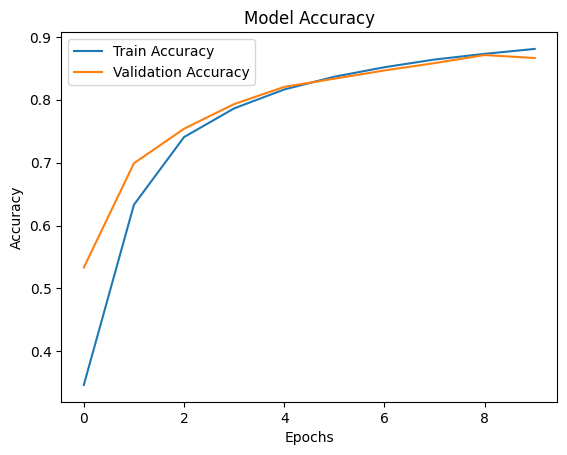

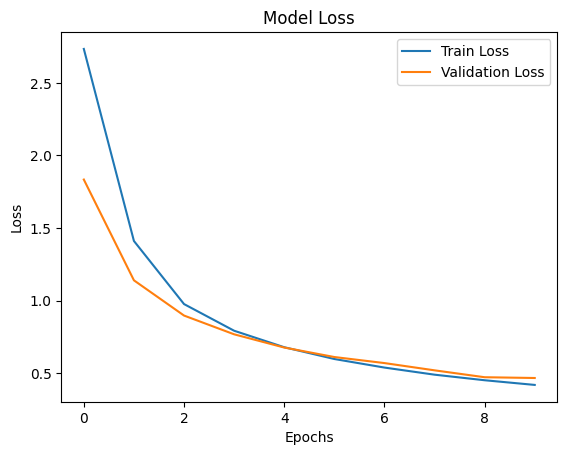

In [49]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(total_class, activation="softmax")) 

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Visualisasi akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualisasi kerugian
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Implement Cross Validation

In [50]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

train_accs = []
val_accs = []

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(total_class, activation="softmax")) 

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)

    train_acc = model.evaluate(X_train_fold, y_train_fold, verbose=0)[1]
    val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]

    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Fold {i}: Training Accuracy = {train_acc}, Validation Accuracy = {val_acc}")

avg_train_acc = np.mean(train_accs)
avg_val_acc = np.mean(val_accs)

print("Average Training Accuracy:", avg_train_acc)
print("Average Validation Accuracy:", avg_val_acc)


Fold 0: Training Accuracy = 0.875167191028595, Validation Accuracy = 0.8653789162635803
Fold 1: Training Accuracy = 0.9264377951622009, Validation Accuracy = 0.9078751802444458
Fold 2: Training Accuracy = 0.9444196820259094, Validation Accuracy = 0.9242199063301086
Fold 3: Training Accuracy = 0.9572776556015015, Validation Accuracy = 0.9381688237190247
Fold 4: Training Accuracy = 0.9628501534461975, Validation Accuracy = 0.946789562702179
Average Training Accuracy: 0.9332304954528808
Average Validation Accuracy: 0.9164864778518677


## Save Model

In [51]:
model_path = './models/12-juni-0130pm.h5'
model.save(model_path)

c:\Users\whisn\anaconda3\envs\bangkitcourse\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load Model

In [52]:
model = load_model(model_path)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                4096      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 66)                2178      
                                                                 
Total params: 8354 (32.63 KB)
Trainable params: 8354 (32.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Test Distribusi Akurasi Per Kelas

In [53]:
test_feat_df = pd.read_csv('./datasets/extraction-feature-default/test-feature.csv')
test_label_df = pd.read_csv('./datasets/extraction-feature-default/test-label.csv')
test_label_df = test_label_df.rename(columns={'0':'true_label'})

display(test_feat_df.head(), test_label_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,-0.359973,-0.124771,0.207212,-0.120611,-0.003317,0.777620,0.032986,0.092505,0.555306,0.164009,0.134613,0.307577,0.323902,0.147291,0.163886,-0.232344,0.047303,0.834808,-0.241916,0.060801,0.628423,-0.098364,0.048934,0.551537,0.042715,...,0.323555,-0.266062,-0.043980,0.290745,0.095847,0.046848,0.053336,0.074459,0.125734,0.195605,-0.020911,0.169722,0.393593,-0.241461,-0.096694,0.046466,0.032120,-0.023031,0.078246,0.012203,0.057123,0.264445,-0.079150,0.107525,0.442095
1,-0.909495,-2.040877,0.013515,-0.934429,-2.057404,0.207488,-1.043621,-2.088389,0.518522,-1.140014,-2.126795,0.693116,-1.145484,-2.131528,0.781834,-1.184593,-1.957323,0.740741,-1.328796,-1.967962,0.867732,-1.362932,-1.991009,0.880714,-1.354003,...,0.855616,-1.239356,-1.968257,0.962962,-1.538256,-2.045689,0.973817,-1.622255,-2.136172,0.848749,-1.630243,-2.173674,0.696266,-1.237522,-1.973703,0.949526,-1.484226,-2.012139,0.911714,-1.588721,-2.074634,0.794840,-1.633073,-2.109839,0.656964
2,-0.242372,-0.059176,0.047362,-0.137848,0.040811,0.521110,-0.024946,0.097904,0.486885,0.098246,0.177881,0.440197,0.226942,0.276334,0.399507,-0.095634,-0.141968,0.612519,0.055462,0.095110,0.623379,0.170818,0.219416,0.606046,0.257665,...,0.609636,-0.169826,-0.234116,0.569925,-0.021618,-0.054442,0.526507,-0.040005,0.110474,0.612016,-0.090003,0.166184,0.679856,-0.188398,-0.230682,0.508610,-0.069740,-0.123951,0.516086,-0.063833,0.018085,0.572836,-0.099012,0.092312,0.607884
3,0.873967,-0.318963,1.453991,0.971282,-0.360654,1.107155,0.933651,-0.354943,0.861588,0.664443,-0.329081,0.586172,0.390657,-0.273399,0.411125,0.969667,-0.253031,0.715343,0.760773,-0.299922,0.494958,0.678634,-0.369394,0.454689,0.625289,...,0.014880,0.735229,-0.351123,0.069951,0.276373,-0.353419,-0.043195,0.275458,-0.247639,0.028273,0.388084,-0.162963,0.194280,0.580506,-0.401636,-0.171609,0.227404,-0.358948,-0.146963,0.248046,-0.250728,-0.066227,0.347462,-0.170702,0.054707
4,-0.802677,0.771503,-0.611622,-0.867988,0.693729,1.257644,-0.631471,0.721750,1.365899,-0.327596,0.823262,1.339516,-0.090847,0.959295,1.305471,-0.296782,0.847258,1.460514,-0.038021,0.953509,1.572719,0.140456,0.972374,1.519605,0.263762,...,1.264848,0.022650,0.904830,1.112831,0.164963,0.961033,1.293396,0.051046,0.955727,1.428236,-0.076839,0.951068,1.426858,0.092609,0.910542,0.885026,0.211777,0.956580,1.214433,0.116977,0.972398,1.464652,0.006547,0.982922,1.585784


,true_label,true_kategorik
0,6,Bapak
1,17,Halo
2,42,P
3,20,Ibu
4,1,Aku


In [54]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(y_pred_classes)

132/132 [==============================] - 0s 680us/step
[ 6 17 42 ... 63  5 43]


In [55]:
eval_df = test_label_df
eval_df['predicted_label'] = y_pred_classes
eval_df['predicted_kategorik'] = label_encoder.inverse_transform(y_pred_classes)
eval_df.head()

,true_label,true_kategorik,predicted_label,predicted_kategorik
0,6,Bapak,6,Bapak
1,17,Halo,17,Halo
2,42,P,42,P
3,20,Ibu,20,Ibu
4,1,Aku,1,Aku


## Find Predicted Label != True Label

In [56]:
eval_df[eval_df['true_label'] != eval_df['predicted_label']].head()

,true_label,true_kategorik,predicted_label,predicted_kategorik
27,56,T,10,D
69,7,Berapa,50,Sedih
89,23,K,10,D
103,23,K,3,B
121,7,Berapa,50,Sedih


In [57]:
len(set(eval_df['true_label'].to_list()))

66

## Get Recall Each Class

In [62]:
# Menghitung jumlah True Positives (TP) dan False Negatives (FN) untuk setiap kelas
recall_data = eval_df.groupby('true_kategorik').apply(
    lambda x: pd.Series({
        'TP': sum(x['true_label'] == x['predicted_label']),
        'FN': sum(x['true_label'] != x['predicted_label'])
    })
)

# Menghitung recall untuk setiap kelas
recall_data['Recall'] = recall_data['TP'] / (recall_data['TP'] + recall_data['FN'])
recall_data['Recall'] = recall_data['Recall'].fillna(0)  # Mengganti NaN dengan 0 jika ada

recall_data_sorted = recall_data.sort_values(by='Recall')
# Menampilkan hasil
print("Recall for each class:")
print(recall_data_sorted)

Recall for each class:
                 TP  FN    Recall
true_kategorik                   
H                49  27  0.644737
P                41  22  0.650794
A                38  12  0.760000
D                40  12  0.769231
K                49  14  0.777778
T                50  14  0.781250
S                50  14  0.781250
N                57  13  0.814286
F                45  10  0.818182
B                49  10  0.830508
M                47   9  0.839286
E                48   9  0.842105
I                54   9  0.857143
Sakit            26   4  0.866667
Sedih            20   3  0.869565
Berapa           34   5  0.871795
Senang           36   5  0.878049
Apa              30   4  0.882353
L                69   9  0.884615
W                57   7  0.890625
X                52   6  0.896552
Kemana           27   3  0.900000
Sama - sama      49   5  0.907407
Z                69   5  0.932432
G                42   3  0.933333
Lelah            51   3  0.944444
U                68   4  

C:\Users\whisn\AppData\Local\Temp\ipykernel_30380\3002033526.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recall_data = eval_df.groupby('true_kategorik').apply(


## Visualize Eval

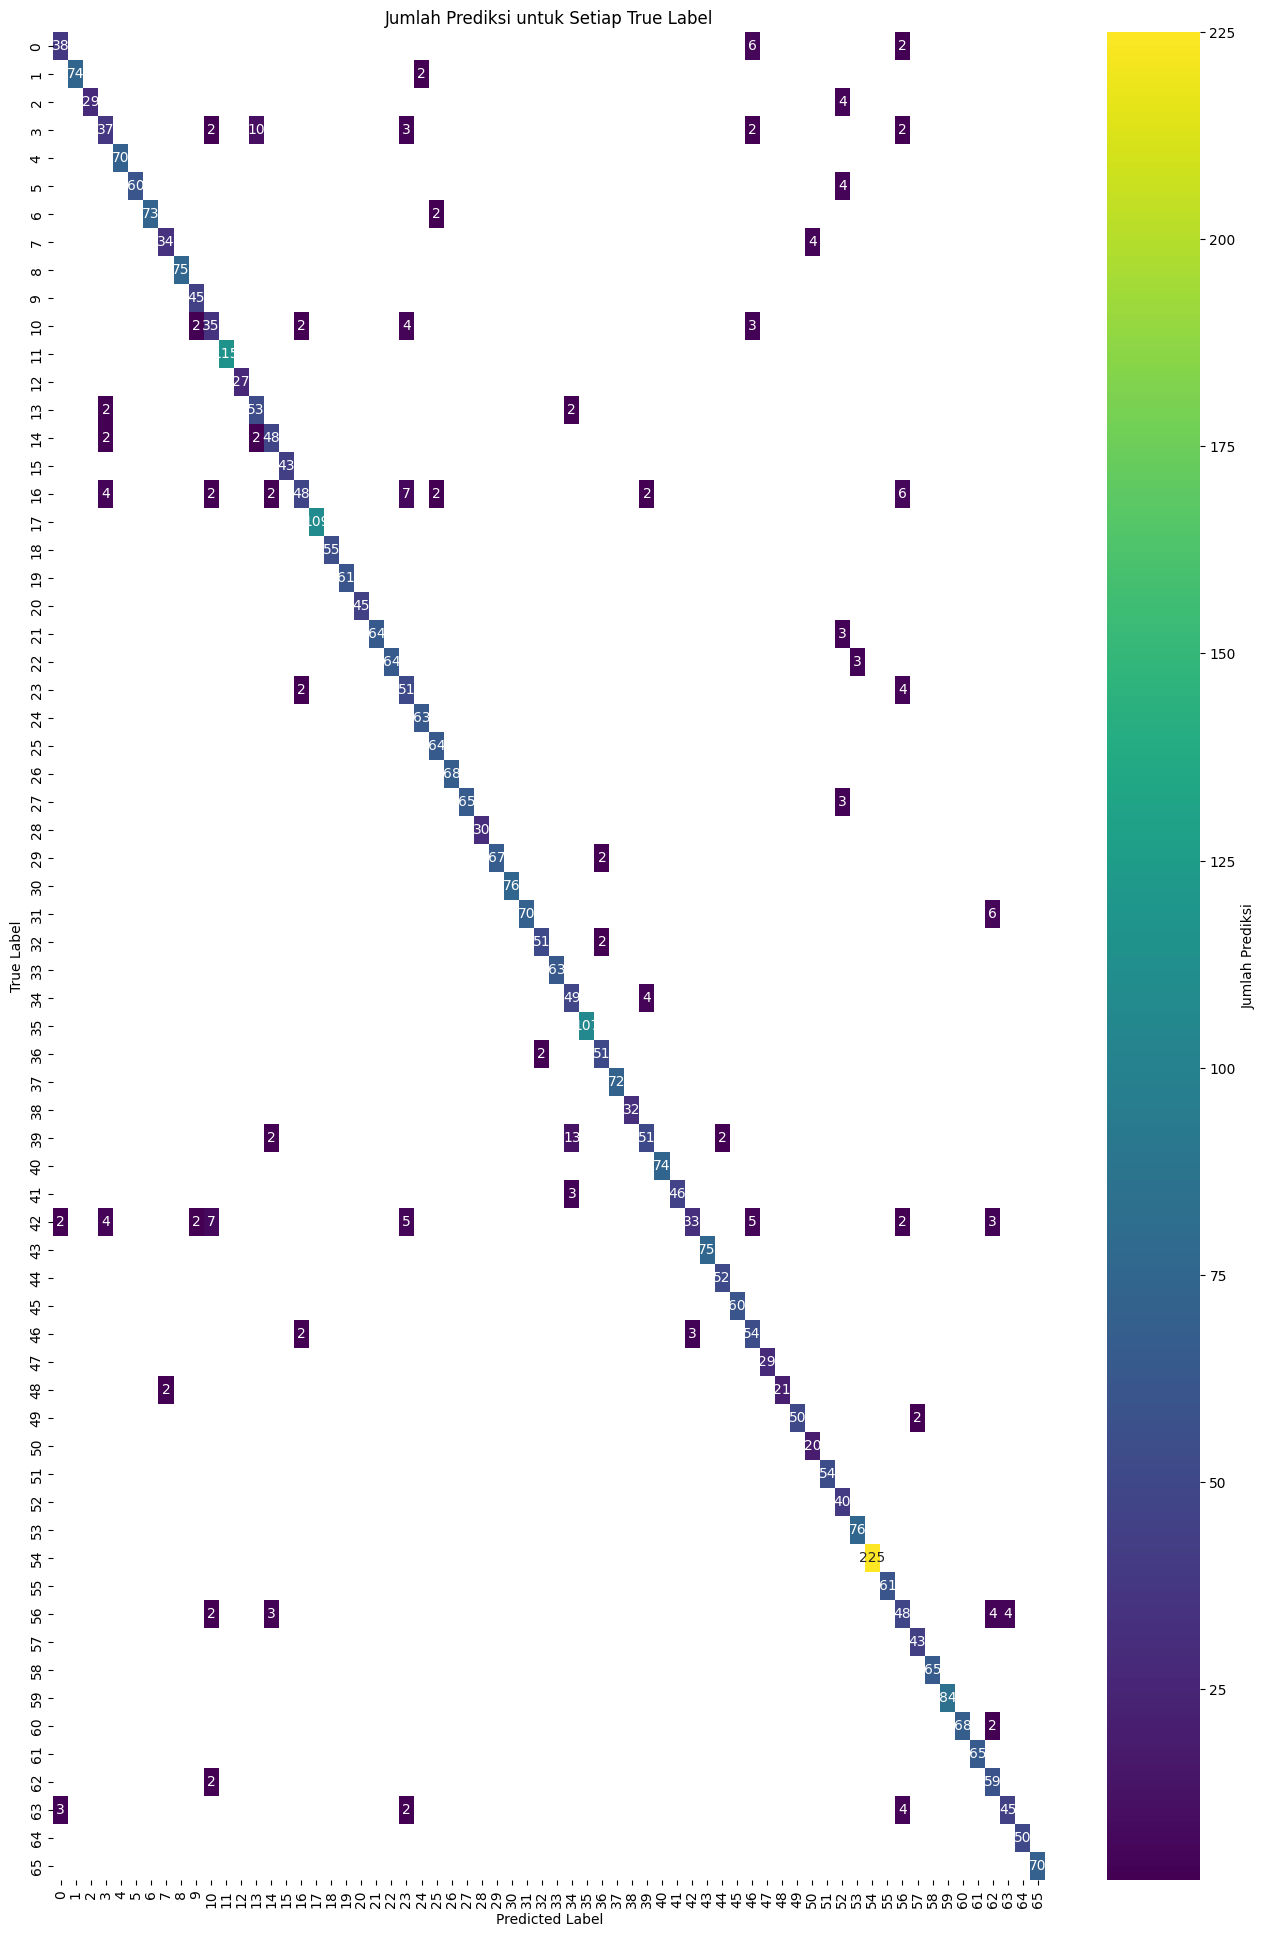

In [ ]:
count_predictions = eval_df.groupby(['true_label', 'predicted_label']).size().unstack(fill_value=0)
mask = count_predictions <= 1

plt.figure(figsize=(16, 24))
sns.heatmap(count_predictions, annot=True, fmt='d', cmap='viridis', mask=mask, cbar_kws={'label': 'Jumlah Prediksi'})
plt.title('Jumlah Prediksi untuk Setiap True Label')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

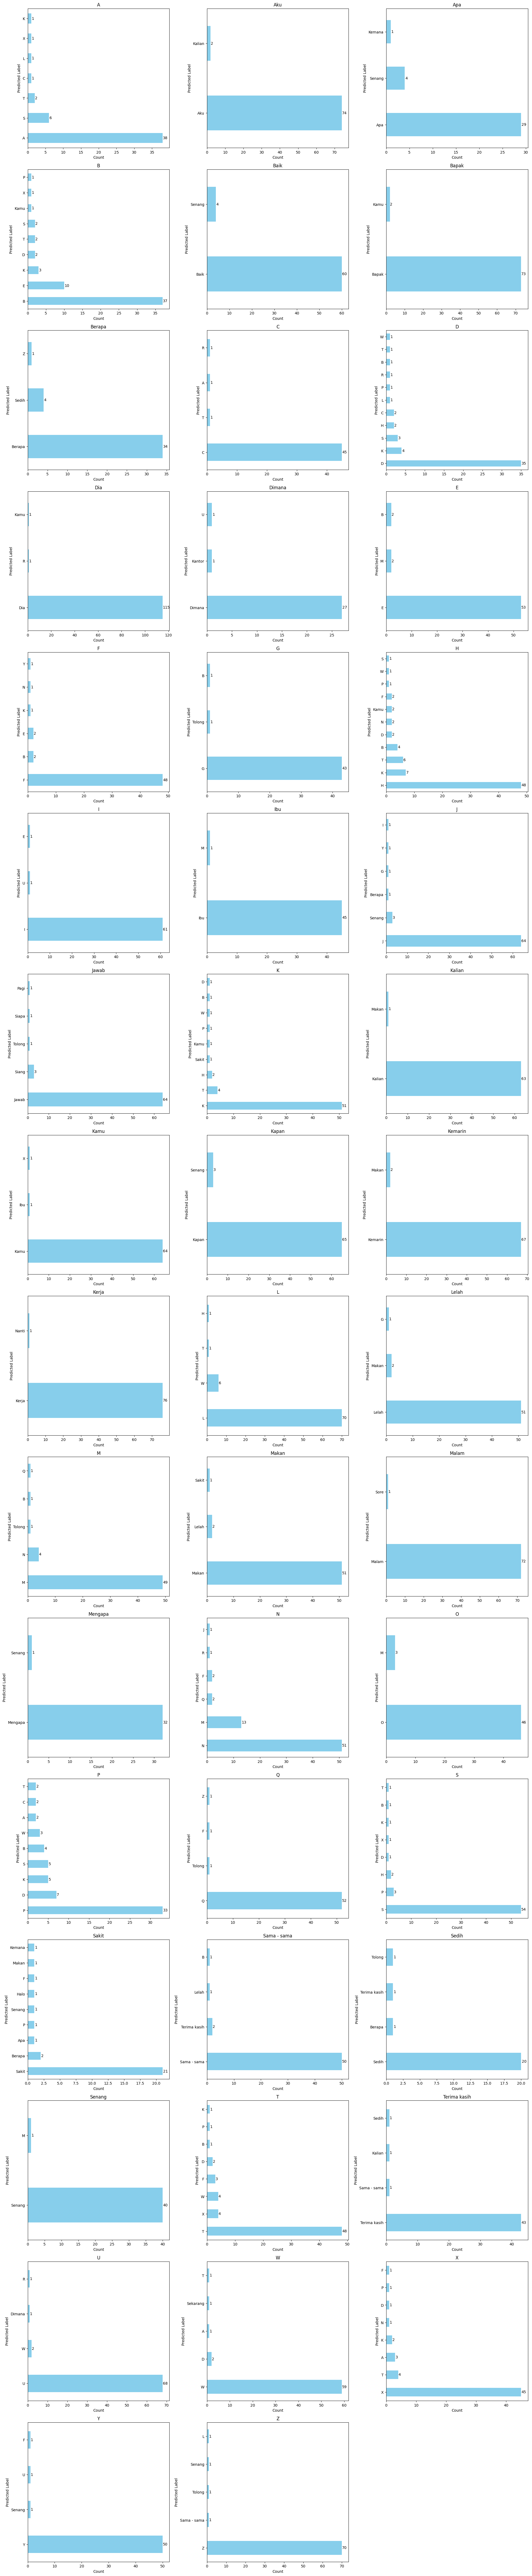

In [ ]:
count_predictions = eval_df.groupby(['true_label', 'predicted_label']).size().unstack(fill_value=0)

num_classes = count_predictions.shape[0]
num_cols = 3
num_rows = (num_classes + num_cols - 1) // num_cols  # Pembulatan ke atas

# Membuat plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
axes = np.array(axes).flatten()

# Plot untuk setiap true_label
plot_count = 0
for i, true_label in enumerate(count_predictions.index):
    # Filter hanya untuk nilai-nilai yang memiliki frekuensi lebih dari nol dan nilai prediksi tidak sama dengan true label
    data_to_plot = count_predictions.loc[true_label][(count_predictions.loc[true_label] > 0) & (count_predictions.columns != true_label)]
    if not data_to_plot.empty and not data_to_plot.eq(0).all():
        ax = axes[plot_count]
        # Mengganti label angka dengan label kategorikal yang sesuai dari DataFrame eval_df
        eval_data_to_plot = eval_df[eval_df['true_label'] == true_label]['predicted_kategorik'].value_counts()
        eval_data_to_plot.plot(kind='barh', ax=ax, color='skyblue')  # Mengubah menjadi plot horizontal ('barh')
        ax.set_xlabel('Count')
        ax.set_ylabel('Predicted Label')  # Mengganti label sumbu x dan y
        ax.set_title(f'{eval_df[eval_df["true_label"] == true_label]["label_kategorik"].iloc[0]}')

        # Menambahkan label angka di sebelah kanan diagram
        for j, v in enumerate(eval_data_to_plot.values):
            ax.text(v + 0.1, j, str(v), ha='left', va='center')
        
        plot_count += 1

# Menghapus axes yang kosong pada layout
for j in range(plot_count, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()